In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Set plotting parameters for figures
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42  # Use TrueType fonts
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5
rcParams['savefig.dpi'] = 300  # Ensure a high resolution

In [ ]:
# Import catrace functions and load dataset configuration
from catrace.exp_collection import read_df
from catrace.dataset import load_dataset_config
dsconfig = load_dataset_config('../dataset_configs/juvenile_dataset.json')

In [5]:
dsconfig.exp_list

[('2021-07-15-DpOBEM-N2_Dp', 'naive'),
 ('2021-07-16-DpOBEM-N3_Dp', 'naive'),
 ('2021-12-10-DpOBEM-N4_Dp', 'naive'),
 ('2021-12-31-DpOBEM-N7_Dp', 'naive'),
 ('2022-02-13-DpOBEM-N10_Dp', 'naive'),
 ('2022-02-20-DpOBEM-N11_Dp', 'naive'),
 ('2021-02-05-DpOBEM-JH9_Dp', 'phe-arg'),
 ('2021-03-18-DpOBEM-JH10_Dp', 'phe-arg'),
 ('2021-03-19-DpOBEM-JH10_Dp', 'phe-arg'),
 ('2021-04-02-DpOBEM-JH11_Dp', 'phe-arg'),
 ('2021-04-03-DpOBEM-JH11_Dp', 'phe-arg'),
 ('2021-05-01-DpOBEM-JH13_Dp', 'phe-arg'),
 ('2021-05-22-DpOBEM-JH14_Dp', 'phe-arg'),
 ('2021-09-15-DpOBEM-JH20_Dp', 'phe-arg'),
 ('2021-09-17-DpOBEM-JH20_Dp', 'phe-arg'),
 ('2021-09-18-DpOBEM-JH20_Dp', 'phe-arg'),
 ('2021-07-30-DpOBEM-JH17_Dp', 'arg-phe'),
 ('2021-07-31-DpOBEM-JH17_Dp', 'arg-phe'),
 ('2021-09-02-DpOBEM-JH18_Dp', 'arg-phe'),
 ('2021-09-03-DpOBEM-JH18_Dp', 'arg-phe'),
 ('2021-09-04-DpOBEM-JH18_Dp', 'arg-phe'),
 ('2021-09-29-DpOBEM-JH21_Dp', 'arg-phe'),
 ('2021-10-01-DpOBEM-JH21_Dp', 'arg-phe'),
 ('2021-10-02-DpOBEM-JH21_Dp', 'ar

In [ ]:
from catrace.exp_collection import concatenate_df_from_db
all_dff = concatenate_df_from_db(dsconfig.processed_trace_dir, dsconfig.exp_list)


2021-07-15-DpOBEM-N2_Dp None
2021-07-16-DpOBEM-N3_Dp None
2021-12-10-DpOBEM-N4_Dp None
2021-12-31-DpOBEM-N7_Dp None
2022-02-13-DpOBEM-N10_Dp None
2022-02-20-DpOBEM-N11_Dp None
2021-02-05-DpOBEM-JH9_Dp None
2021-03-18-DpOBEM-JH10_Dp None
2021-03-19-DpOBEM-JH10_Dp None
2021-04-02-DpOBEM-JH11_Dp None
2021-04-03-DpOBEM-JH11_Dp None
2021-05-01-DpOBEM-JH13_Dp None
2021-05-22-DpOBEM-JH14_Dp None
2021-09-15-DpOBEM-JH20_Dp None
2021-09-17-DpOBEM-JH20_Dp None
2021-09-18-DpOBEM-JH20_Dp None
2021-07-30-DpOBEM-JH17_Dp None
2021-07-31-DpOBEM-JH17_Dp None
2021-09-02-DpOBEM-JH18_Dp None
2021-09-03-DpOBEM-JH18_Dp None
2021-09-04-DpOBEM-JH18_Dp None
2021-09-29-DpOBEM-JH21_Dp None
2021-10-01-DpOBEM-JH21_Dp None
2021-10-02-DpOBEM-JH21_Dp None
2021-10-14-DpOBEM-JH22_Dp None
2021-11-10-DpOBEM-JH23_Dp None
2021-11-11-DpOBEM-JH23_Dp None
2021-11-14-DpOBEM-JH23_Dp None
2021-11-24-DpOBEM-JH24_Dp None
2021-11-27-DpOBEM-JH24_Dp None
2021-11-26-DpOBEM-JH24_Dp None


In [ ]:
dffs = {cond: all_dff.T.xs(cond, level='condition').T for cond in dsconfig.conditions}

In [8]:
# Select some neurons that are responsive to both odors
cut_time = 2.3 # The traces showed be shifted to the left by 2.3s, so that the odor onset is approximately 2s
cut_frame = int(cut_time * dsconfig.frame_rate)
total_time = 10 # Total time to plot, 10s
total_frame = int(total_time * dsconfig.frame_rate)
frame_range = (cut_frame, cut_frame + total_frame) # Frame range to select from the saved firing rate dataframe

# Select the frames
from catrace.process_time_trace import select_time_points
dffs = {cond: select_time_points(dff, frame_range)
        for cond, dff in dffs.items()}

# Select odors
from catrace.process_time_trace import select_odors_df
selected_odors = ['Arg', 'Phe', 'Trp', 'TDCA']
dffs = {cond: select_odors_df(dff, selected_odors)
        for cond, dff in dffs.items()}

# Select trials
trial_number = 0
dffs = {cond: dff.xs(trial_number, level='trial')
        for cond, dff in dffs.items()}

/tmp/ipykernel_288381/2077544062.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_response = dff_response.groupby('odor').mean()


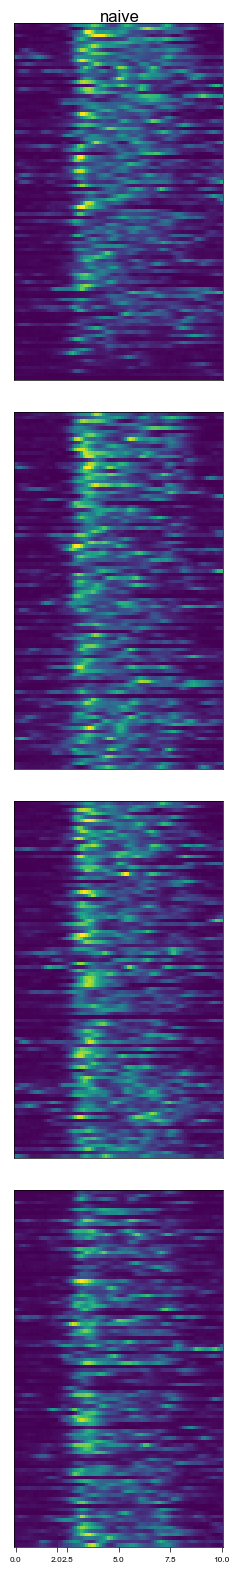

/tmp/ipykernel_288381/2077544062.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_response = dff_response.groupby('odor').mean()


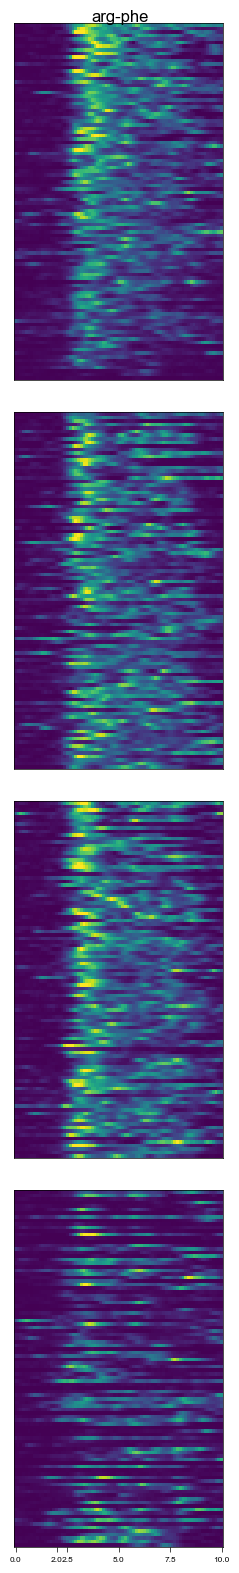

/tmp/ipykernel_288381/2077544062.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_response = dff_response.groupby('odor').mean()


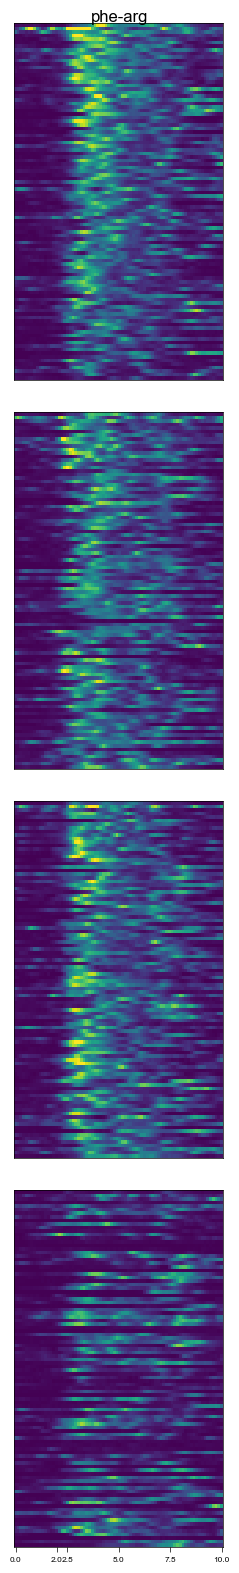

/tmp/ipykernel_288381/2077544062.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_response = dff_response.groupby('odor').mean()


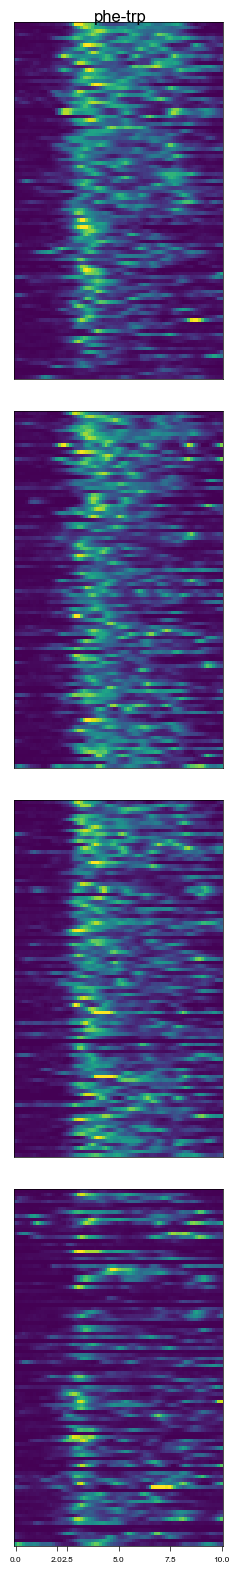

In [13]:
import matplotlib.pyplot as plt
from catrace.plot_trace import plot_example_trace_heatmap
def plot_selected_odors_heatmap(dff, num_neurons):
    response_frame_range = (38, 76)
    dff_response = select_time_points(dff, response_frame_range)
    mean_response = dff_response.groupby('odor').mean()
    response_median = mean_response.median()
    idxs = response_median.sort_values(ascending=False).head(num_neurons).index

    # Sub dataframe selected by top 200 responsive neurons
    mean_response_sub = mean_response.loc[:, idxs]
    # Sort again by response to Arg
    idxs2 = mean_response_sub.loc['Arg'].sort_values(ascending=False).index

    dff_selected_and_sorted = dff.loc[:, idxs2]
    dff_selected_and_sorted

    # Now plot heatmap for each odor
    # Create subplots with one column, len(selected_odors) rows
    num_selected_odors = len(selected_odors)
    fig, axes = plt.subplots(num_selected_odors, 1, figsize=(2.5, 4*num_selected_odors), sharex=True)
    for idx, odor in enumerate(selected_odors):
        plot_example_trace_heatmap(dff_selected_and_sorted.xs(odor, level='odor').T, dsconfig.frame_rate, gamma=1, vmin=0, vmax=18, ax=axes[idx])
    for ax in axes[:-1]:
        ax.tick_params(bottom=False, labelbottom=False)

    axes[-1].tick_params(labelsize=6)

    return fig


# Save figure
import os
from catrace.for_paper import save_figure_for_paper
paper_fig_dir = '../../figures_for_paper/juvenile/example_trace'
os.makedirs(paper_fig_dir, exist_ok=True)

num_neurons = 100  # Number of neurons to plot
for cond, dff in dffs.items():
    fig = plot_selected_odors_heatmap(dff, num_neurons=num_neurons)
    fig.suptitle(cond)
    fig.tight_layout()
    # Make the vertical space between subplots a bit larger
    fig.subplots_adjust(hspace=0.09)
    save_figure_for_paper(fig, f'firing_rate_heatmap_condition_{cond}_num_neurons_{num_neurons}', paper_fig_dir)
    plt.show()